# A) Data Cleaning

In [1]:
from Project.Data_Cleaning import clean_data
from Project.GDP_Pop_Extraction.extraction import extract_data

df = extract_data()

#This operation takes about 1.5 minutes on an average laptop, the modified dataset
#can be read from the main directory if we are not focusing on this part
data = clean_data.CleanData(df) # Use cd.CleanData(log_level = 0) to see logging messages
#The main source of the wait time is __decimal_fix in the init function
modified = data.modified
NaN = data.NaN
NoNaN = data.NoNaN
feature_tables = data.feature_tables

#To create csvs from the results of data cleaning
#data.create_csvs()

In [2]:
# A sample slice of the dataset
#To bypass the wait time above, comment the upper part, uncomment the lines below
#****WARNING***** The PCA and map_display functions requires the CleanData object above
import pandas as pd
modified = pd.read_csv('output/modified.csv')
modified = modified.drop('Unnamed: 0',axis = 1)

In [3]:
print('\nBelow there is a sample from the modified dataset')
modified


Below there is a sample from the modified dataset


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015.0,1.0,65.0,263.0,62.0,0.01,71.279625,65.0,1154.000,...,60.0,8.16,65.0,0.1,569.57794,33.736492,17.2,17.3,0.479,10.1
1,Afghanistan,2014.0,1.0,59.9,271.0,64.0,0.01,73.523580,62.0,492.000,...,58.0,8.18,62.0,0.1,629.34530,32.758020,17.5,17.5,0.476,10.0
2,Afghanistan,2013.0,1.0,59.9,268.0,66.0,0.01,73.219246,64.0,430.000,...,62.0,8.13,64.0,0.1,638.61255,31.731688,17.7,17.7,0.470,9.9
3,Afghanistan,2012.0,1.0,59.5,272.0,69.0,0.01,78.184210,67.0,278.700,...,67.0,8.52,67.0,0.1,669.00903,30.696959,17.9,18.0,0.463,9.8
4,Afghanistan,2011.0,1.0,59.2,275.0,71.0,0.01,70.971085,68.0,301.300,...,68.0,7.87,68.0,0.1,603.53705,29.708600,18.2,18.2,0.454,9.5
5,Afghanistan,2010.0,1.0,58.8,279.0,74.0,0.01,79.679370,66.0,198.900,...,66.0,9.20,66.0,0.1,553.30030,28.803167,18.4,18.4,0.448,9.2
6,Afghanistan,2009.0,1.0,58.6,281.0,77.0,0.01,56.762220,63.0,286.100,...,63.0,9.42,63.0,0.1,445.89330,28.004332,18.6,18.7,0.434,8.9
7,Afghanistan,2008.0,1.0,58.1,287.0,80.0,0.03,25.873926,64.0,159.900,...,64.0,8.33,64.0,0.1,373.36110,27.294031,18.8,18.9,0.433,8.7
8,Afghanistan,2007.0,1.0,57.5,295.0,82.0,0.02,10.910156,63.0,114.100,...,63.0,6.73,63.0,0.1,369.83580,26.616793,19.0,19.1,0.415,8.4
9,Afghanistan,2006.0,1.0,57.3,295.0,84.0,0.03,17.171518,64.0,199.000,...,58.0,7.43,58.0,0.1,272.56308,25.893450,19.2,19.3,0.405,8.1


# B) Principal Component Analysis

In [4]:
from Project.PCA import pca_analysis

result_pca = pca_analysis.PCA_Analysis(data)

eig_vals = result_pca.eig_vals
Nmin = pca_analysis.calnum(eig_vals)
print(f'Minimum number of eigen values for the subsace to provide enough (85%) information: {Nmin}\n')

x = result_pca.x
finalDf = result_pca.finalDf
features = result_pca.features

pcoef, finalcomp = pca_analysis.calcoefficient(x,finalDf,features)

print('The 5 different feature combinations obtained from PCA are shown below.')
print('In each combination there are 4 positive and 4 negative components.\n')
for index,i in enumerate(finalcomp):
    print(f'{index+1} - ', end =" ")
    for j in i:
        print(j,end =", ")
    print('')
    
print('\nWe will use these results to determine the most relevant features.')

Minimum number of eigen values for the subsace to provide enough (85%) information: 9

The 5 different feature combinations obtained from PCA are shown below.
In each combination there are 4 positive and 4 negative components.

1 -  Measles, Adult Mortality, under-five deaths, infant deaths, Diphtheria, BMI, percentage expenditure, GDP, 
2 -  Measles, GDP, percentage expenditure, under-five deaths, Income composition of resources, Hepatitis B,  HIV/AIDS, Adult Mortality, 
3 -  Measles, GDP, percentage expenditure, Adult Mortality, infant deaths, Hepatitis B, Diphtheria, Population, 
4 -  Measles, Adult Mortality,  HIV/AIDS, Diphtheria, Income composition of resources, BMI, percentage expenditure, GDP, 
5 -  Measles, Adult Mortality, under-five deaths, Diphtheria, Polio, Hepatitis B, percentage expenditure, GDP, 

We will use these results to determine the most relevant features.


D:\Users\ericl\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# C) Pre Visualization

In [4]:
from Project.Map_Display import map_display
from IPython.display import SVG

features = list(modified.copy().columns)
features.remove('Country')
features.remove('Year')
print(features)

map_display.displaymap(data,features[1], 2000)

['Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


AttributeError: module 'matplotlib.cm' has no attribute 'RdYIGn'

In [3]:
map_display.displaymap(data,features[1], 2015)

NameError: name 'map_display' is not defined

In [7]:
#map_display.display(data,features[3], 2013)
#map_display.display(data,features[4], 2012)

C:\Users\ericl\Documents\GitHub2\ECE143-Life-expectancy\Project\Map_Display\analysis_part1.py:125: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  newdata = data2000.sort_index(by='Life expectancy ')
C:\Users\ericl\Documents\GitHub2\ECE143-Life-expectancy\Project\Map_Display\analysis_part1.py:26: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  data=data.sort_index(by=feature)


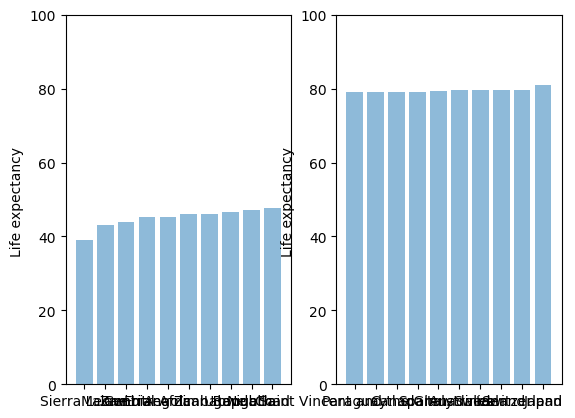

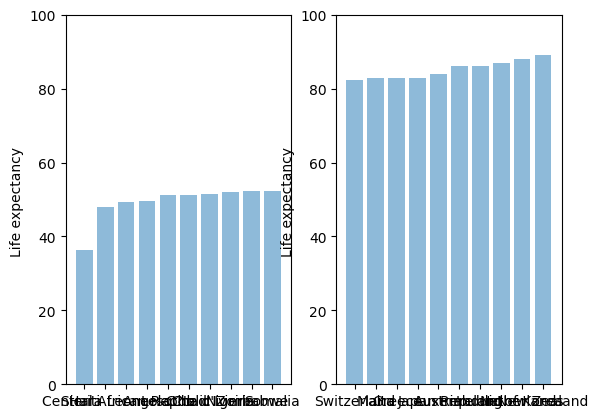

C:\Users\ericl\Documents\GitHub2\ECE143-Life-expectancy\Project\Map_Display\analysis_part1.py:88: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  data=data.sort_index(by='Life expectancy ')


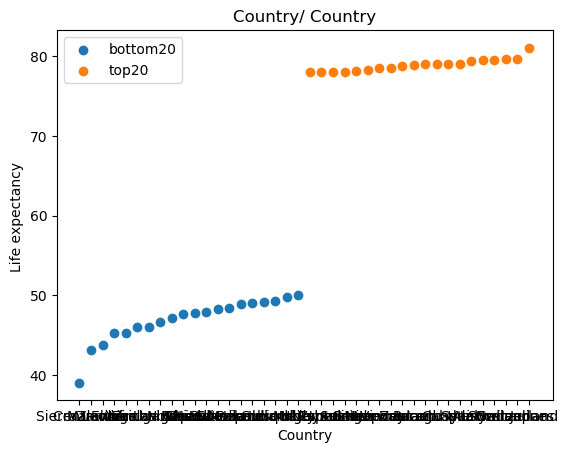

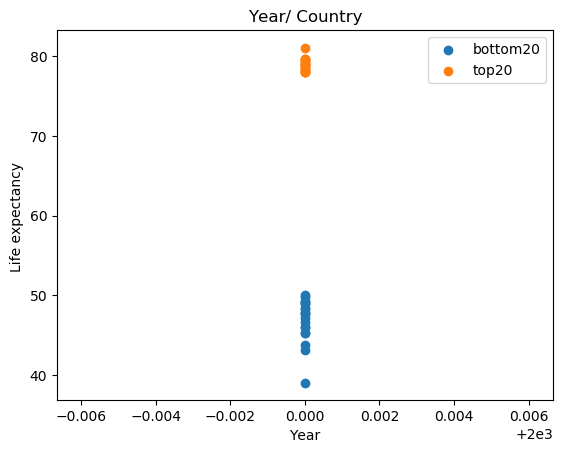

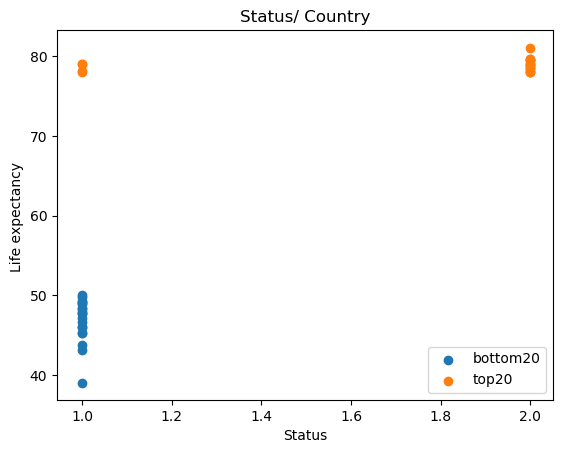

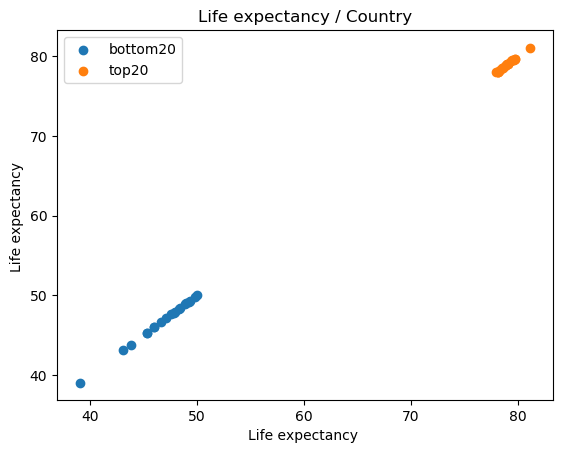

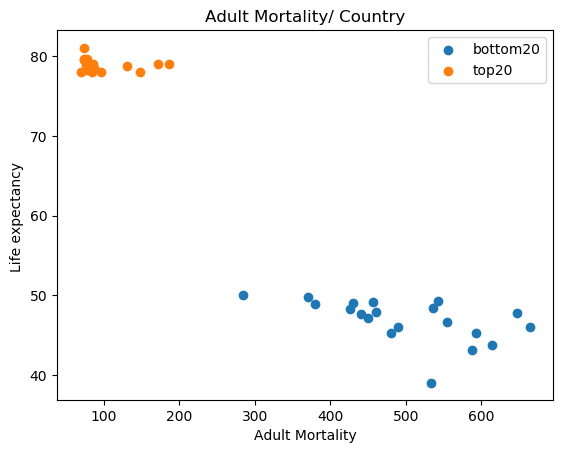

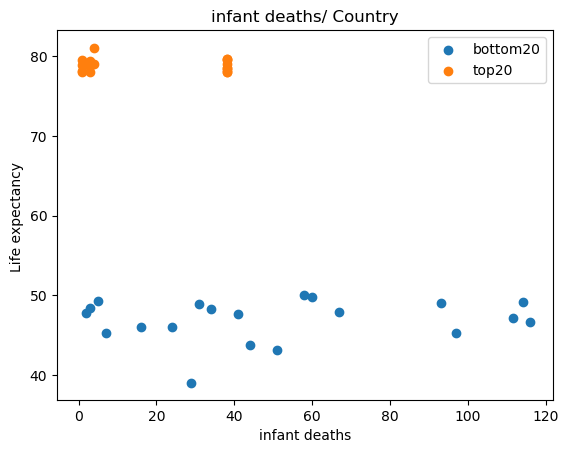

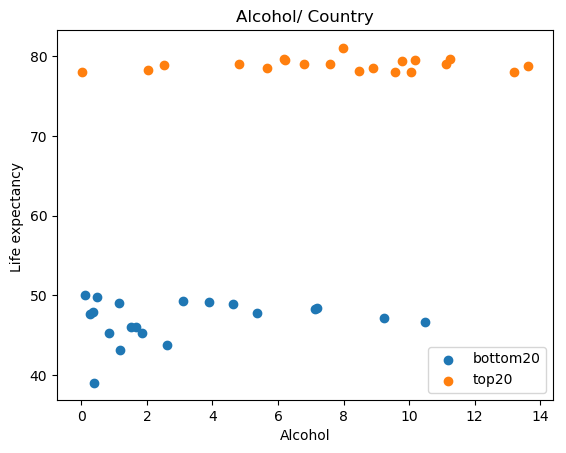

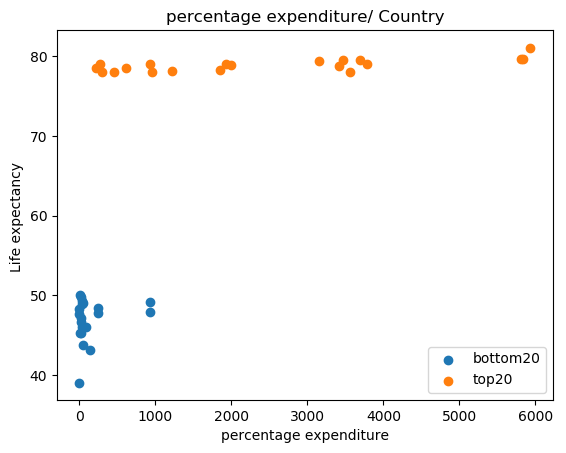

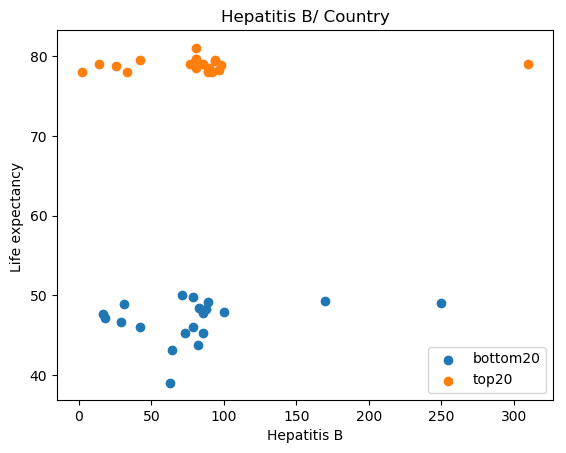

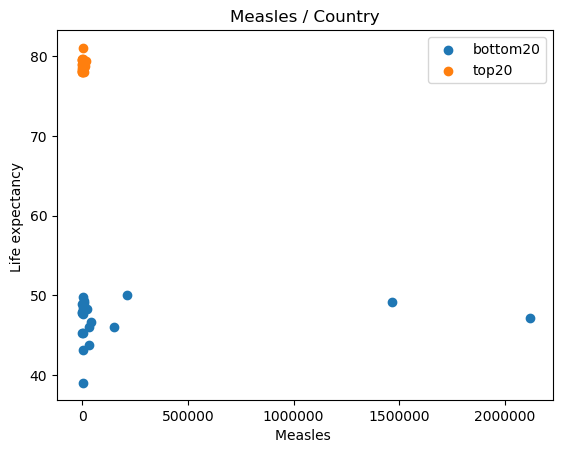

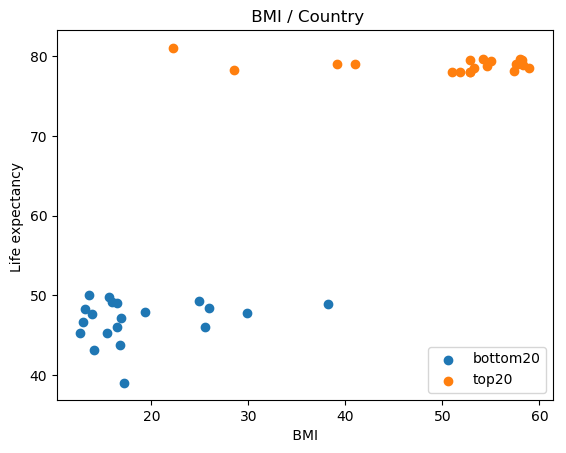

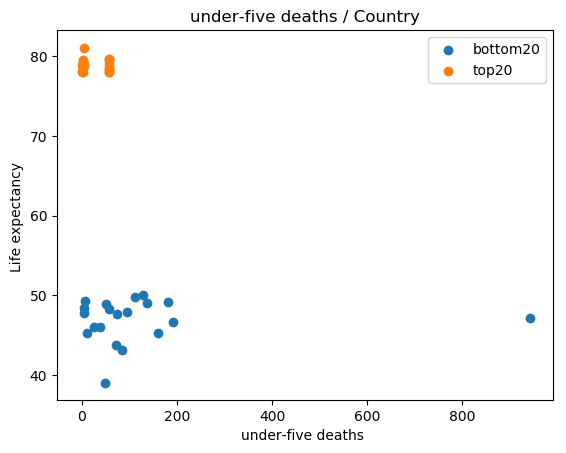

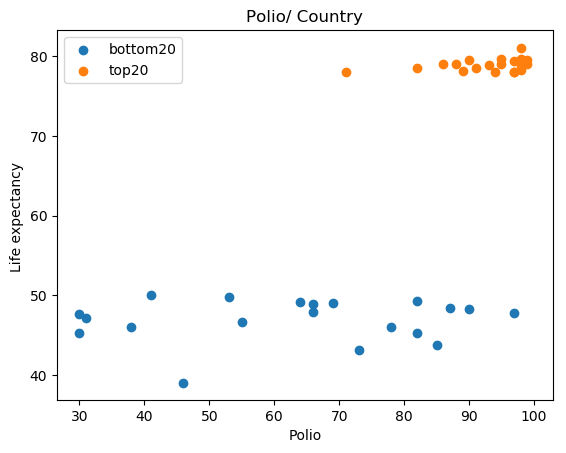

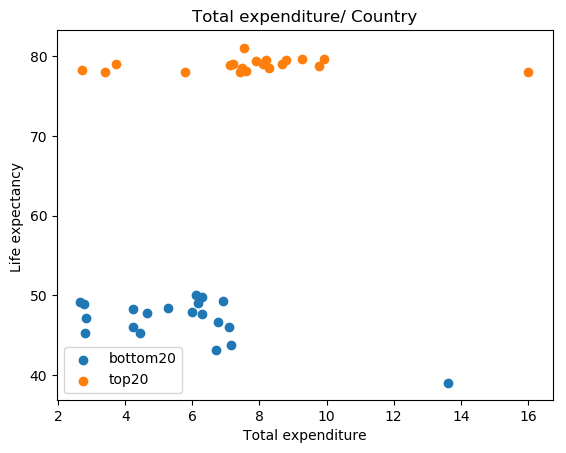

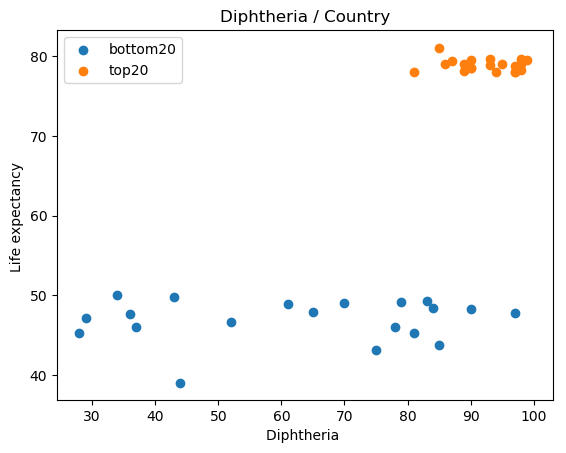

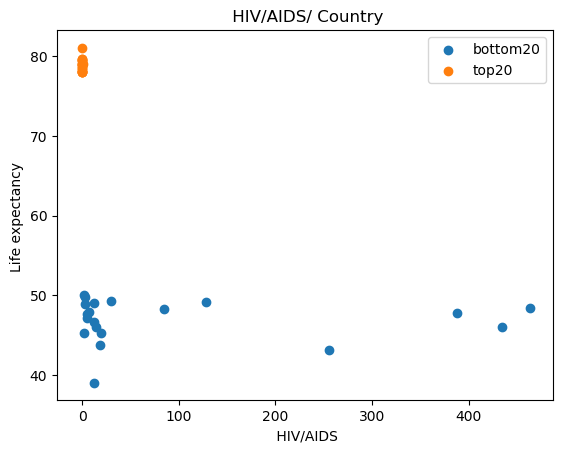

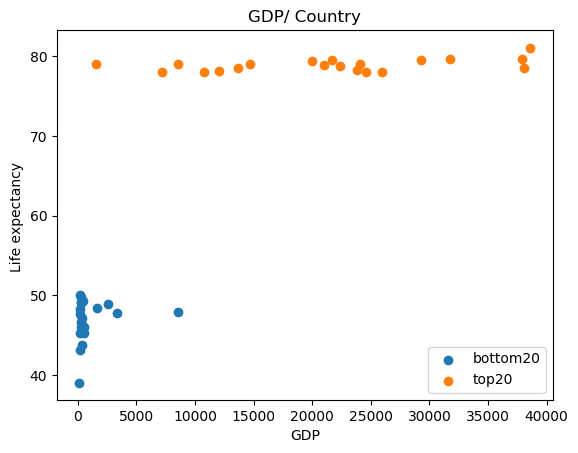

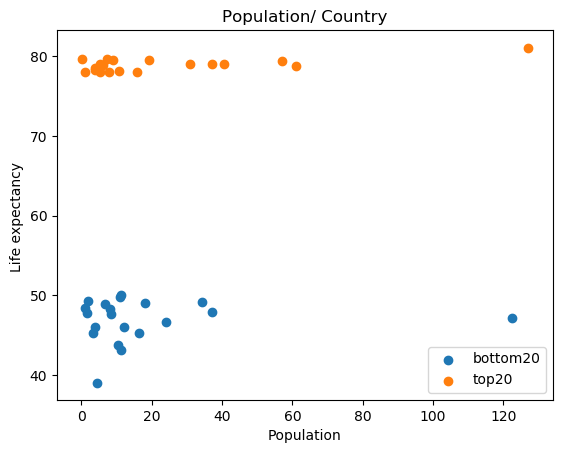

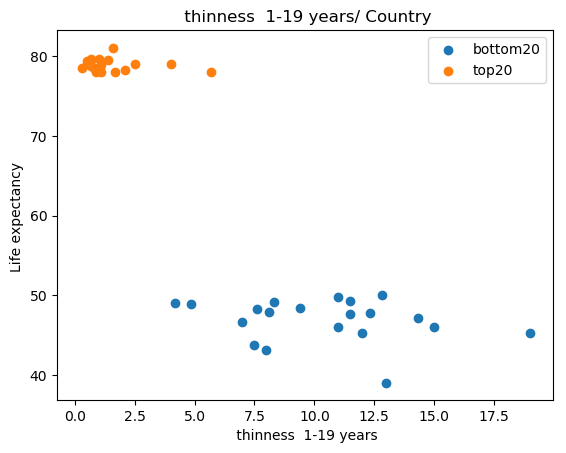

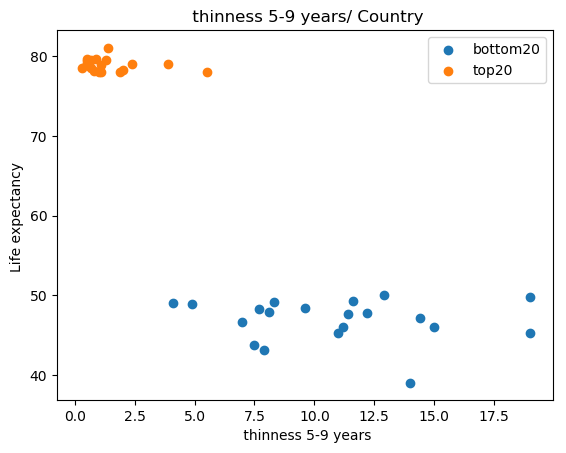

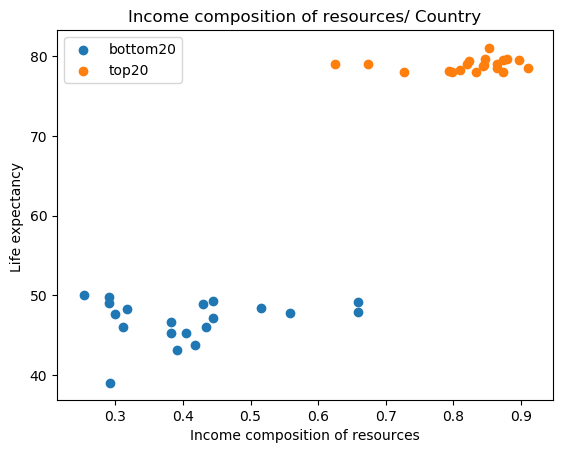

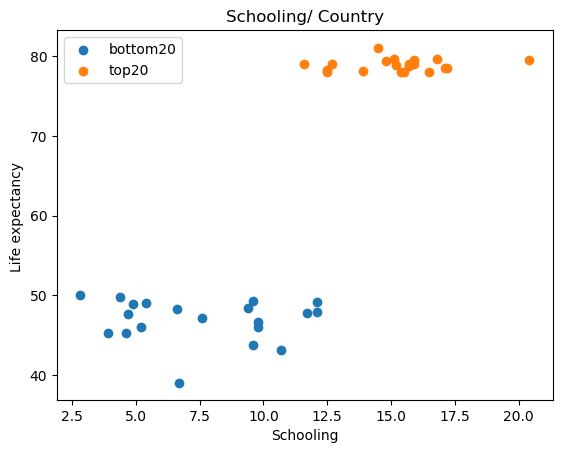

In [8]:
from Project.Map_Display.analysis_part1 import analysis

#The below function prints raw output, which is the first step of our analysis
analysis(modified.copy())

In [2]:
from Project.Map_Display.analysis_part1 import sortdata
from Project.Map_Display.analysis_part1 import showScatter
from Project.Map_Display.analysis_part1 import showBar_alt
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

# D) Visualization Part 1 (Differences between countries)

C:\Users\ericl\Documents\GitHub2\ECE143-Life-expectancy\Project\Map_Display\analysis_part1.py:63: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  data=data.sort_index(by='Life expectancy ')


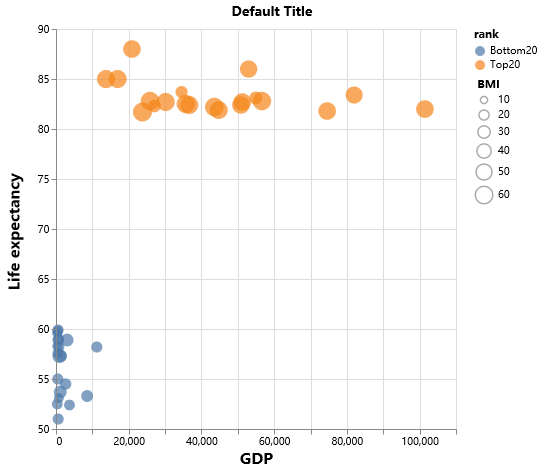

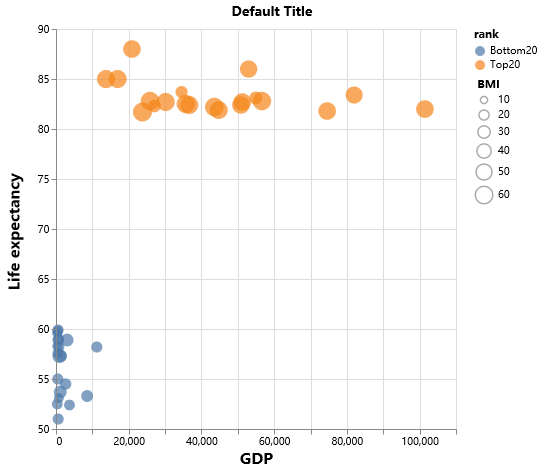

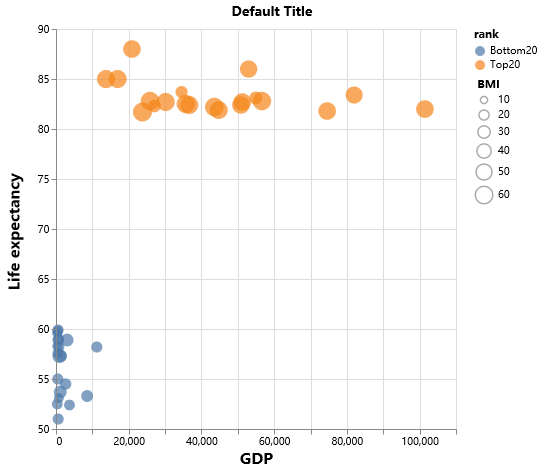

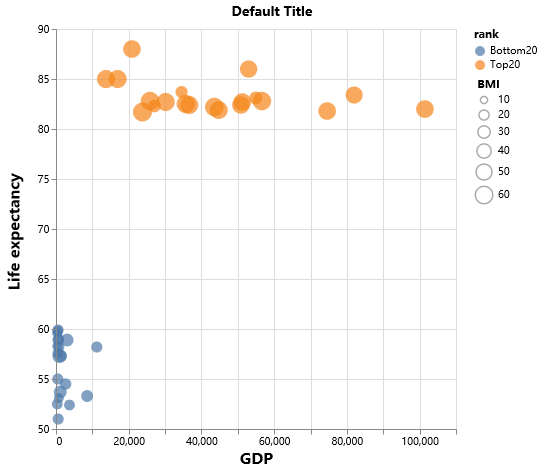

In [10]:
#below shows the plots we present for countries with best and worst life expectancy.
showScatter(modified.copy(),'GDP',' BMI ',height=400,width=400,year=2015,title="Default Title")

C:\Users\ericl\Documents\GitHub2\ECE143-Life-expectancy\Project\Map_Display\analysis_part1.py:63: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  data=data.sort_index(by='Life expectancy ')


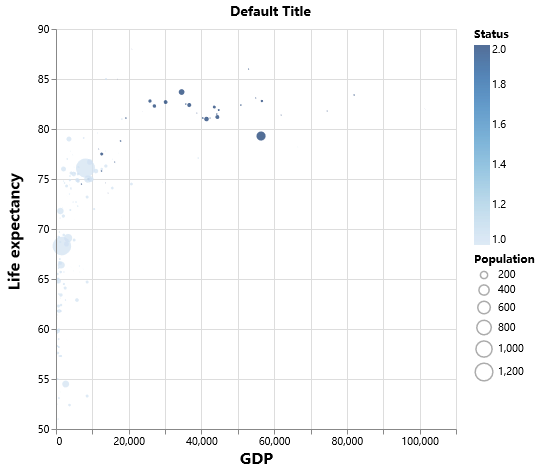

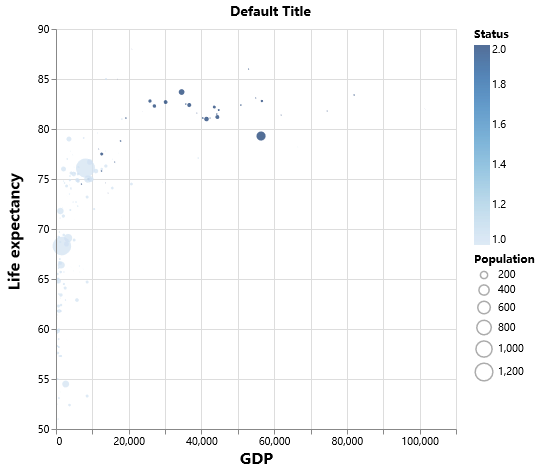

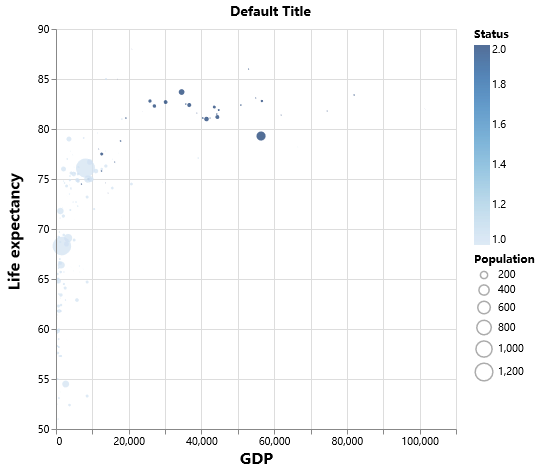

In [8]:
showScatter(modified.copy(),'GDP','Population',height=400,width=400,year=2015,title="Default Title",color='Status',nums=90)

In [6]:
modified.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

C:\Users\ericl\Documents\GitHub2\ECE143-Life-expectancy\Project\Map_Display\analysis_part1.py:63: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  data=data.sort_index(by='Life expectancy ')


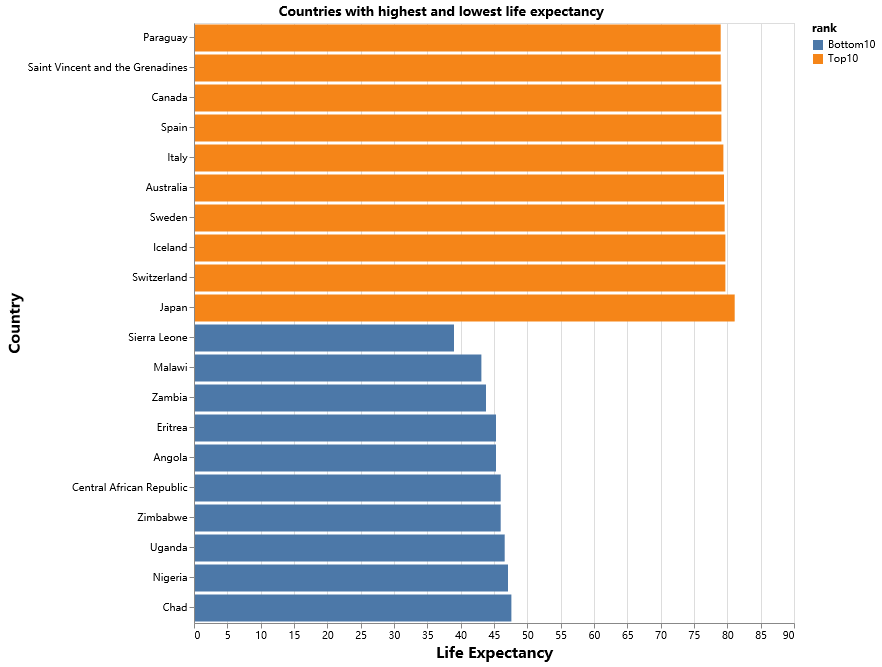

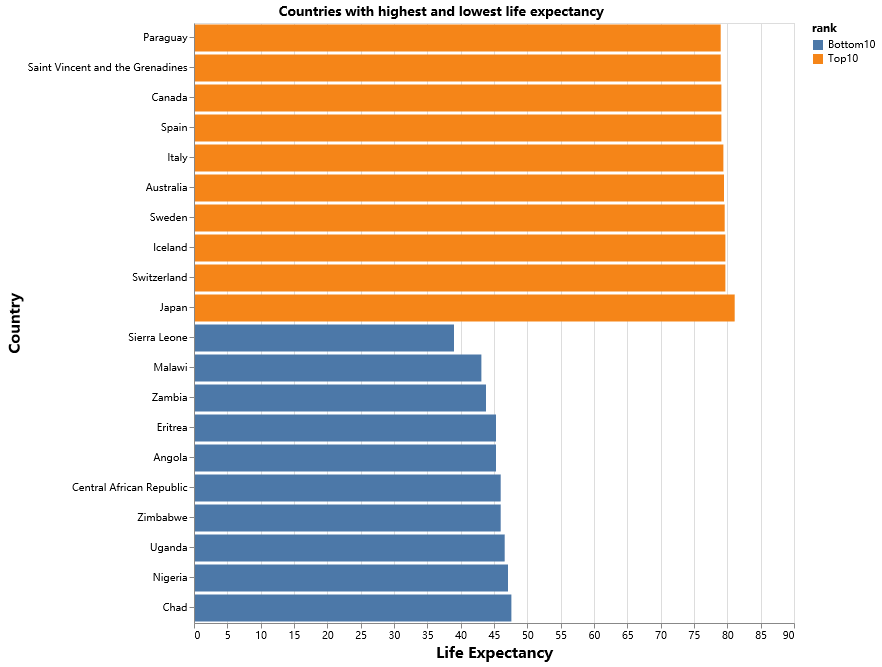

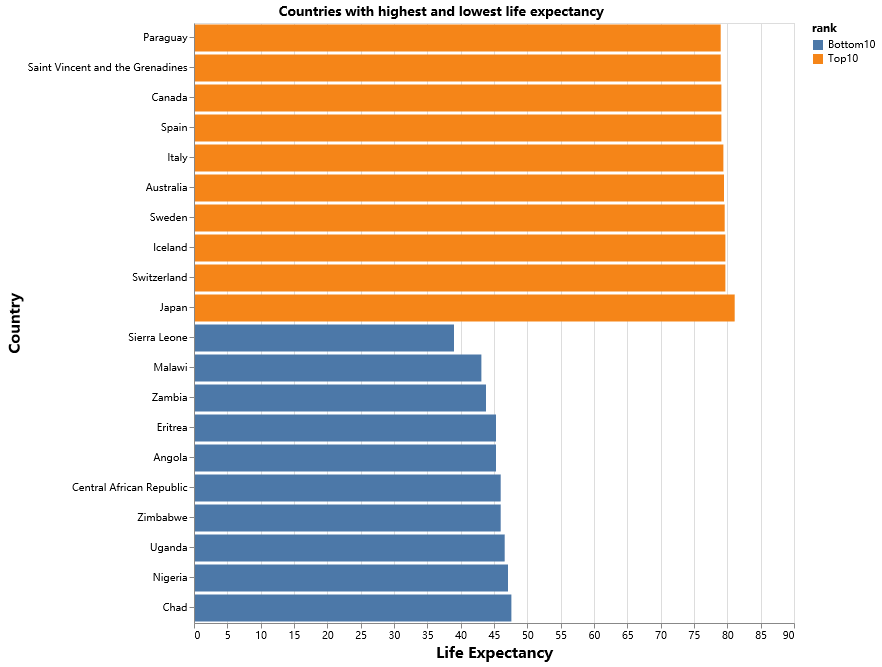

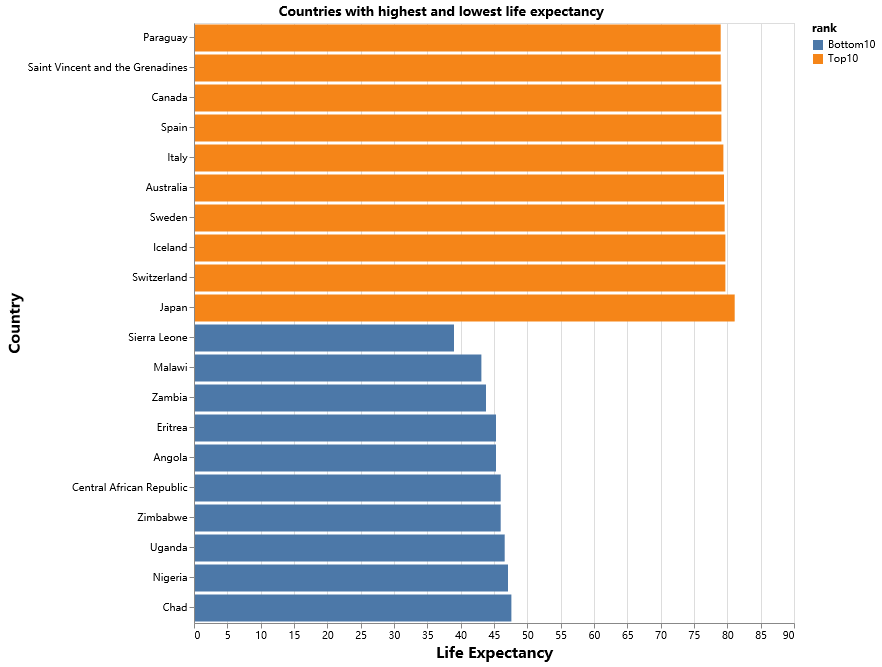

In [8]:
#plot the comparison of life expectancy between top10 and bottom 10 countries in 2000. 
showBar_alt(modified.copy(),height=600,width=600,title='Countries with highest and lowest life expectancy')

C:\Users\ericl\Documents\GitHub2\ECE143-Life-expectancy\Project\Map_Display\analysis_part1.py:63: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  data=data.sort_index(by='Life expectancy ')


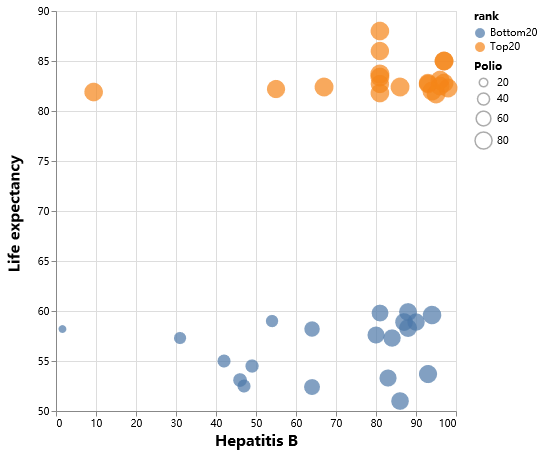

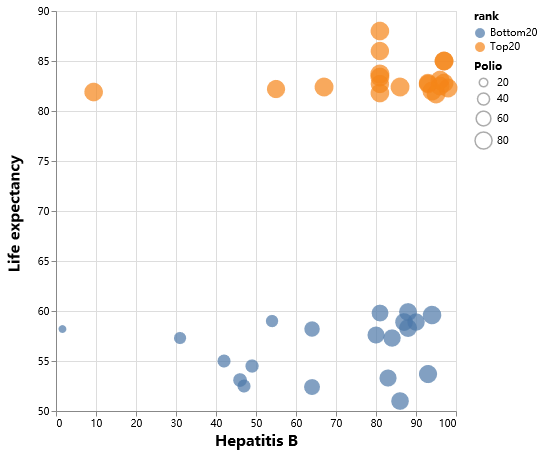

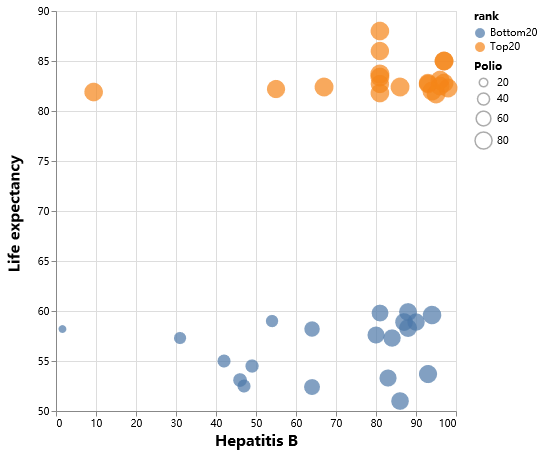

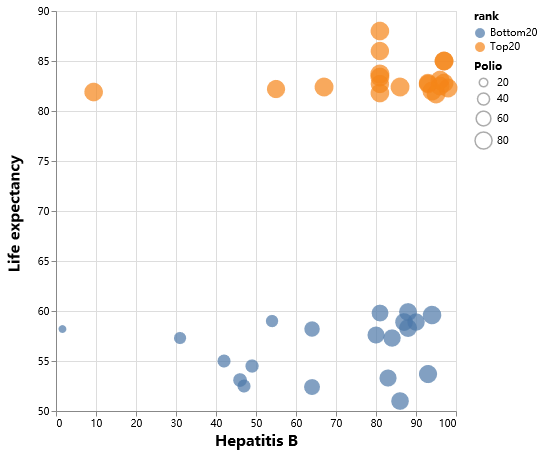

In [15]:
#plot Diphtheria, Polio and life expectancy
showScatter(modified.copy(),'Hepatitis B','Polio',nums=20,year=2015,height=400,width=400)

C:\Users\ericl\Documents\GitHub2\ECE143-Life-expectancy\Project\Map_Display\analysis_part1.py:63: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  data=data.sort_index(by='Life expectancy ')


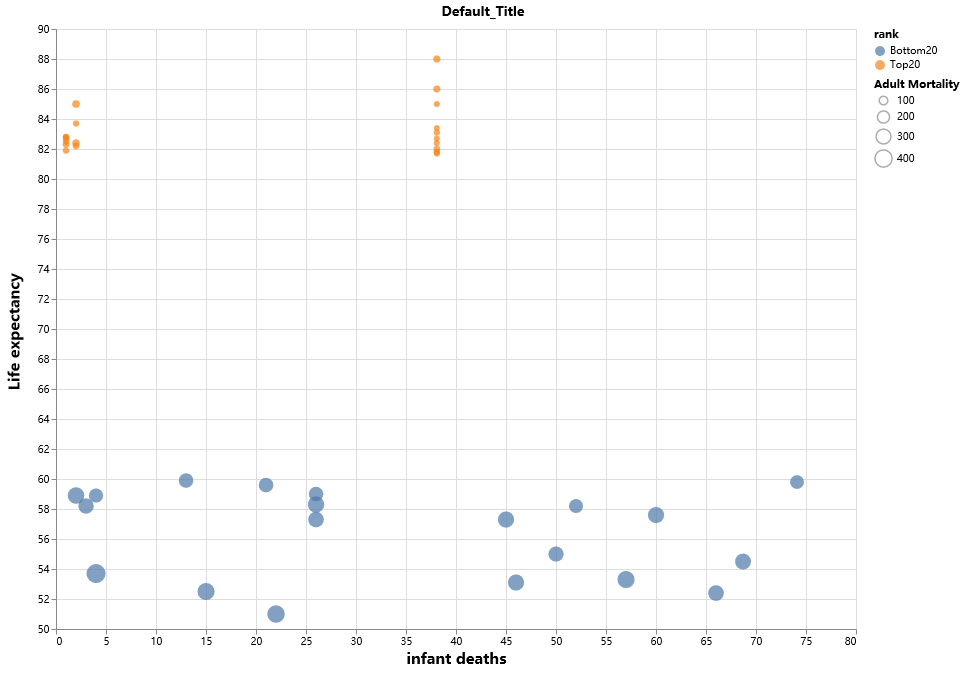

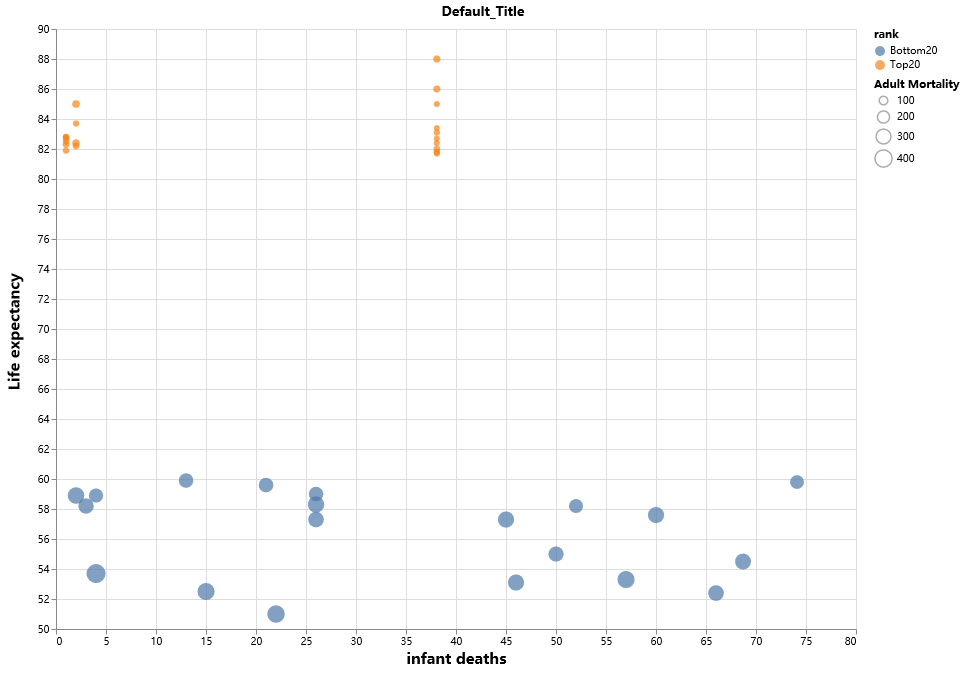

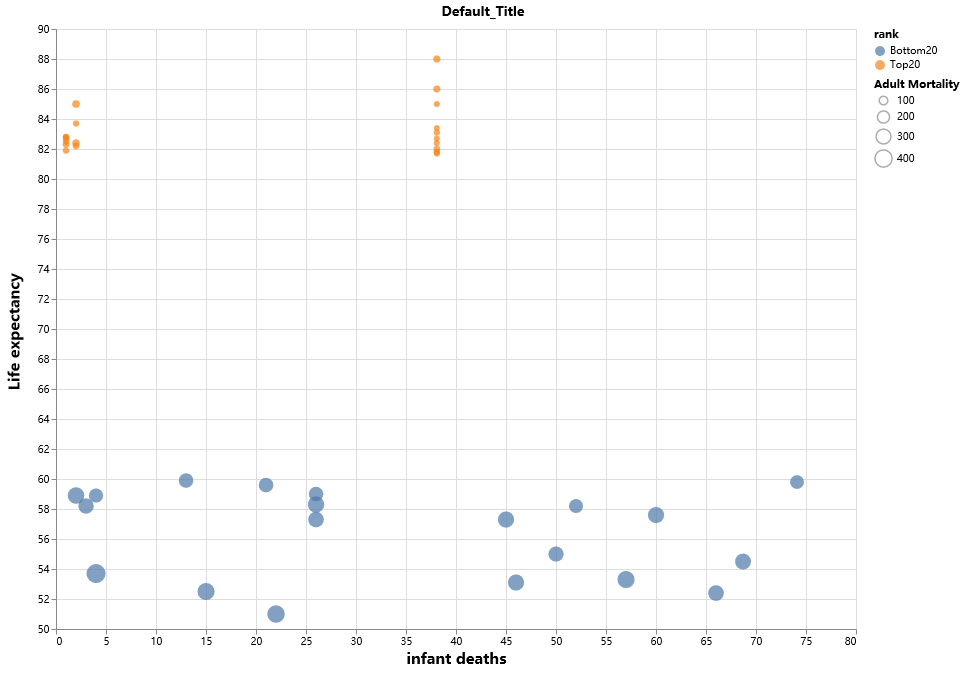

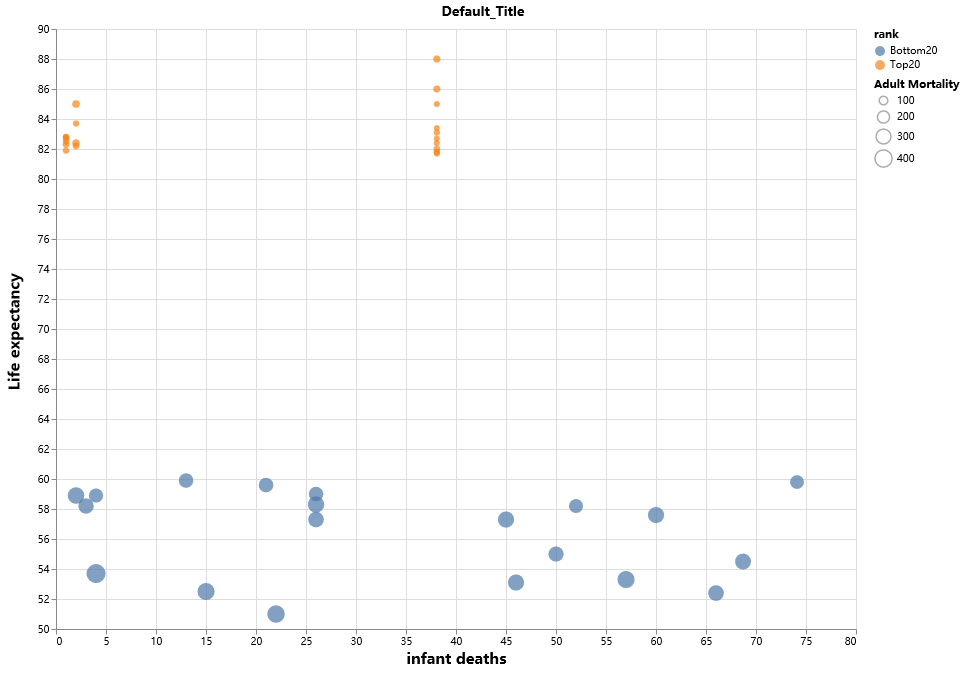

In [7]:
#plot infant death, adult mortality and life expectancy
showScatter(modified.copy(),'infant deaths','Adult Mortality',nums=20,year=2015)
# The adult mortality rate shown in the World Development Indicators (WDI) 
# database and related products refers to the probability that those who have reached age 
# 15 will die before reaching age 60 (shown per 1,000 persons).

#Infant deaths means the probability that those who die before 12month, per 1,000 persons. From WHO

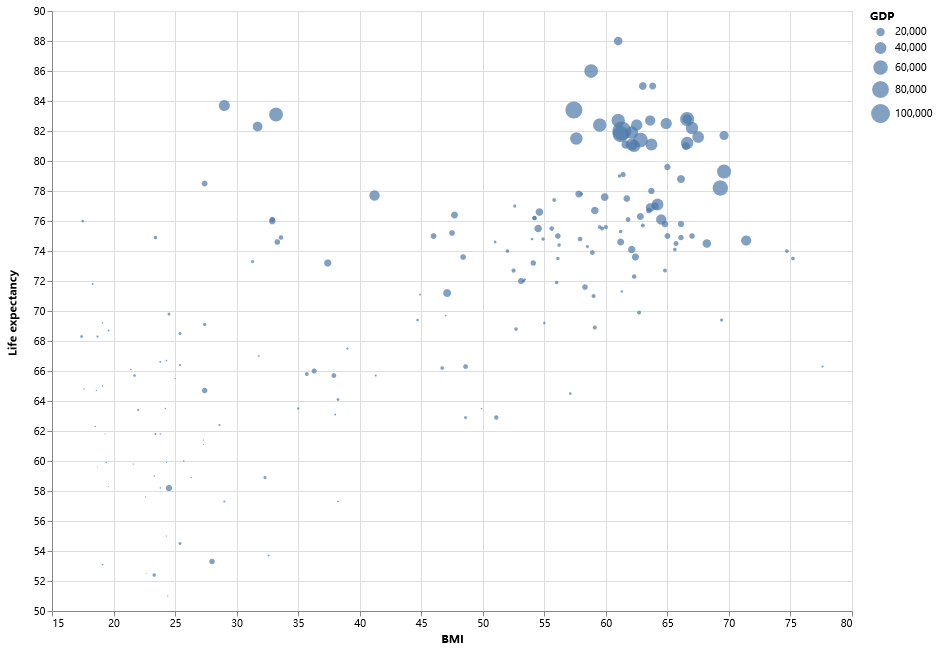

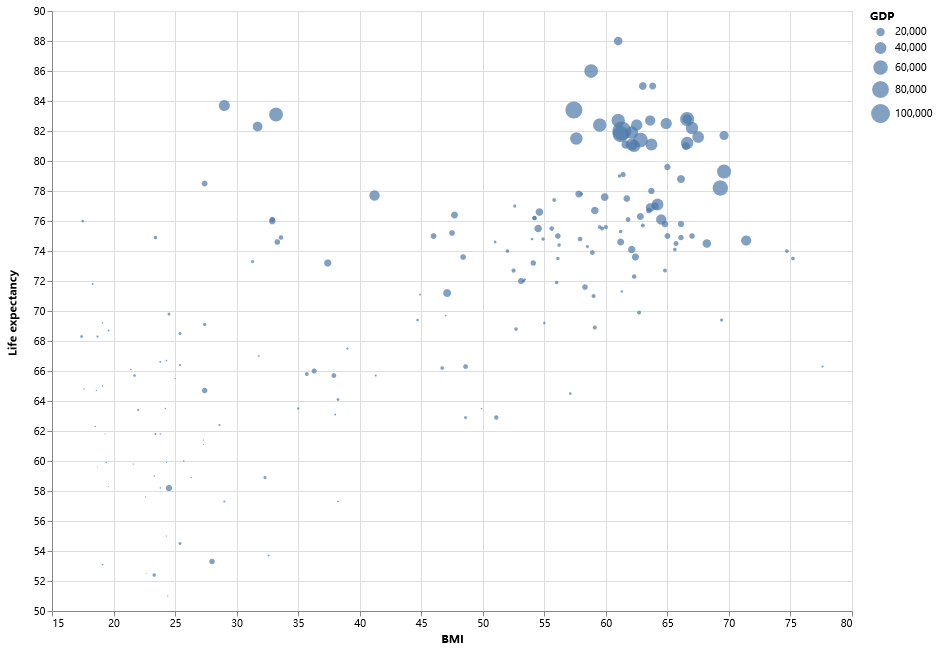

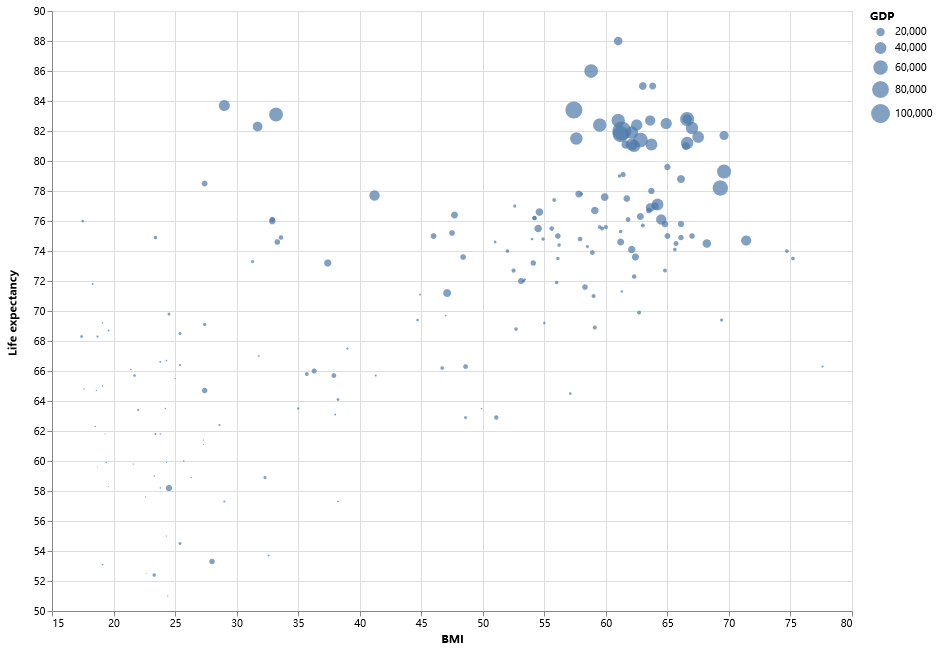

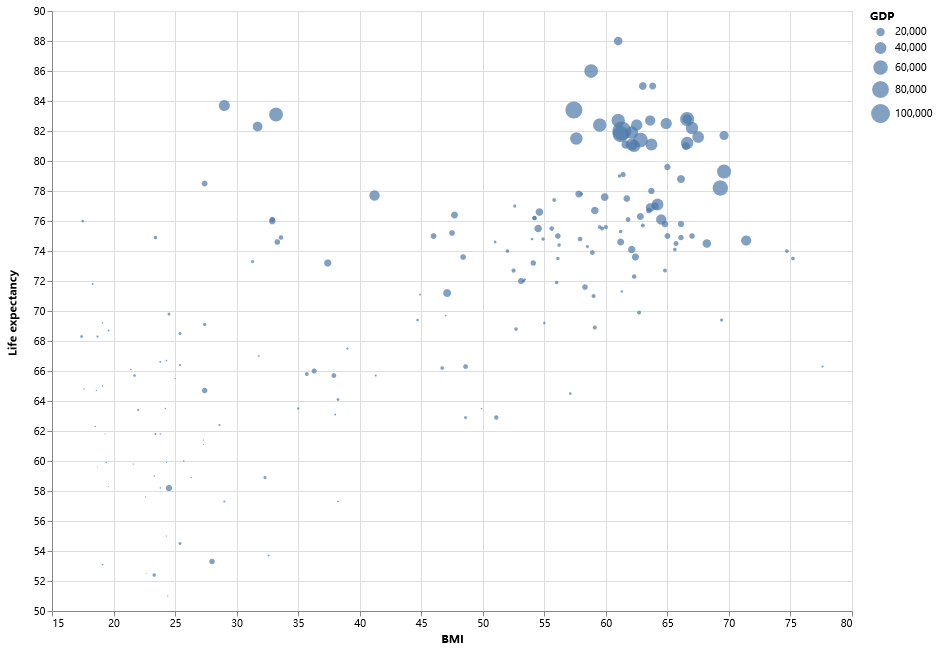

In [15]:
#plot GDP/capita and BMI for all countries
modified_temp = modified.copy()
alt.Chart(modified_temp[modified_temp['Year']==2015]).mark_circle().encode(
    alt.X(' BMI ', scale=alt.Scale(zero=False)),
    alt.Y('Life expectancy ', scale=alt.Scale(zero=False, padding=1)),
    #color='Country',
    size='GDP'
).properties(
    height=600,
    width=800
)

# E) Visualization Part 2 (Most relevant features)

In [17]:
from Project.Relevance_Analysis import integrate_relevance
from Project.Relevance_Analysis import integrate_year
from Project.Relevance_Analysis import rate_highlight
from Project.Relevance_Analysis import wordcloud

#Modified should be already defined above

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
integrate_year.visual_allfeaturechaning(modified.copy())

In [ ]:
rate_highlight.visual_highlightrate(modified.copy())

In [ ]:
#TODO integrate relevance

In [ ]:
text = 'GDP,HIV,Population, Schooling, Mortality,infant,Alcohol,expenditure%,Measles,BMI,15belowdeaths,Polio,ExpenditureTotal,Diphtheria,IncomeResources,GDP,YoungThinness'

wordcloud.visual_wordcloud(text)

# F) Visualization Part 3 (Change through the years)

In [ ]:
from Project.Change_Analysis import change_analysis

# Generates the necessary graphs for the 3rd part of our Visualization
change_analysis.generate_results(modified.copy())

# G) Linear Regression and Neural Networks

In [ ]:
from Project.Regression_Prediction import test_regression
test_regression.regression_analysis(modified)